KNN - Best number of neighbors: 21, Weights: uniform
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.75      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.74       768
weighted avg       0.78      0.78      0.77       768



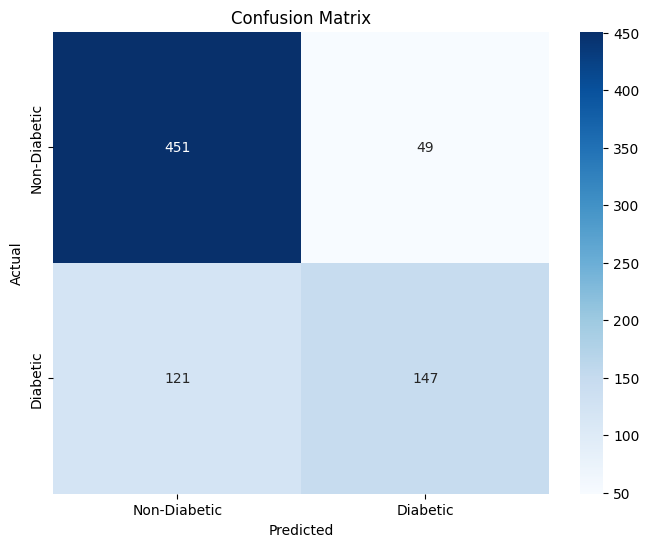

Decision Tree - Best max depth: 2
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.72      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.76       768



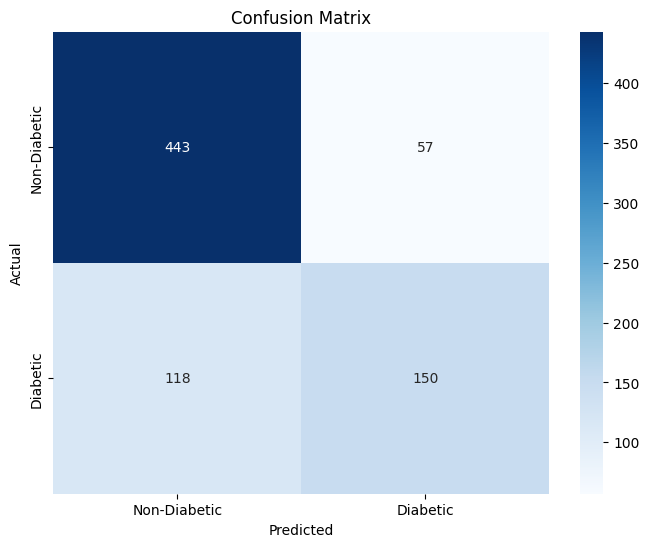

Random Forest - Best n_estimators: 200, Best max depth: 5
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       500
           1       0.84      0.68      0.75       268

    accuracy                           0.84       768
   macro avg       0.84      0.80      0.82       768
weighted avg       0.84      0.84      0.84       768



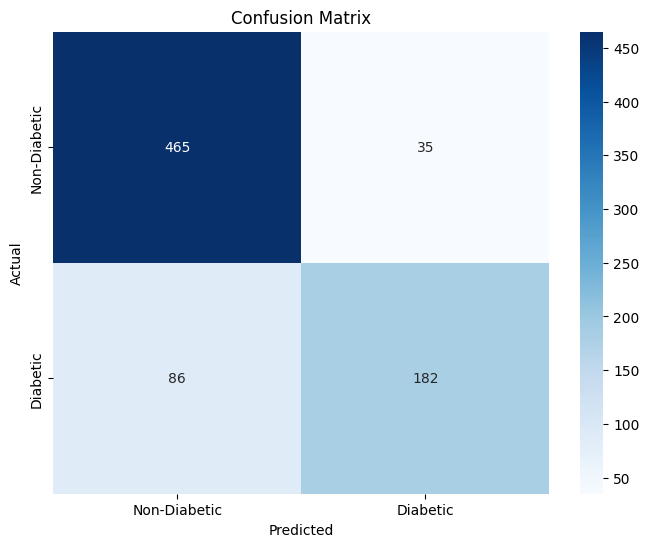

SVM - Best C: 1, Best gamma: 0.01
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       500
           1       0.76      0.54      0.64       268

    accuracy                           0.78       768
   macro avg       0.78      0.73      0.74       768
weighted avg       0.78      0.78      0.77       768



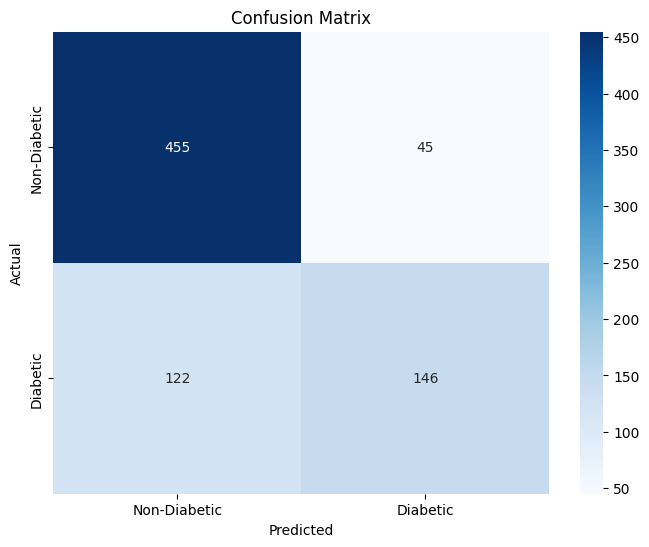

In [1]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix  
from numpy import mean, std  

def load_data(filepath):  
    try:  
        df = pd.read_csv(filepath)  
        return df  
    except Exception as e:  
        print(f"Error loading data: {e}")  
        return None  

def preprocess_data(df):   
    X = df.iloc[:, :-1].values.astype('float32')  # Feature matrix  
    y = LabelEncoder().fit_transform(df.iloc[:, -1].astype('str'))  # Target variable  

    # Scale features  
    scaler = StandardScaler()  
    X_scaled = scaler.fit_transform(X)  
    
    return X_scaled, y  

def run_knn(X, y):    
    cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=5382)  
    model = KNeighborsClassifier()  
    param_grid = {  
        'n_neighbors': np.arange(1, 31),  # Increase upper limit for neighbors  
        'weights': ['uniform', 'distance']  # Check both uniform and distance weights  
    }  
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)  
    grid.fit(X, y)  
    print(f'KNN - Best number of neighbors: {grid.best_params_["n_neighbors"]}, Weights: {grid.best_params_["weights"]}')  
    return grid.best_estimator_  

def run_decision_tree(X, y):  
    cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=5382)  
    model = DecisionTreeClassifier(random_state=5382)  
    
    param_grid = {'max_depth': np.arange(1, 21)}  
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)  
    grid.fit(X, y)  
    print(f'Decision Tree - Best max depth: {grid.best_params_["max_depth"]}')  
    return grid.best_estimator_  

def run_random_forest(X, y):  
    cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=5382)  
    model = RandomForestClassifier(random_state=5382)  
    
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None] + list(np.arange(1, 21))}  
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)  
    grid.fit(X, y)  
    print(f'Random Forest - Best n_estimators: {grid.best_params_["n_estimators"]}, Best max depth: {grid.best_params_["max_depth"]}')  
    return grid.best_estimator_  

def run_svm(X, y):  
    cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=5382)  
    model = SVC(random_state=5382)  
    
    param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}  
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)  
    grid.fit(X, y)  
    print(f'SVM - Best C: {grid.best_params_["C"]}, Best gamma: {grid.best_params_["gamma"]}')  
    return grid.best_estimator_  

def plot_confusion_matrix(y_true, y_pred):  
    confusion = confusion_matrix(y_true, y_pred)  
    plt.figure(figsize=(8, 6))  
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',  
                xticklabels=['Non-Diabetic', 'Diabetic'],  
                yticklabels=['Non-Diabetic', 'Diabetic'])  
    plt.ylabel('Actual')  
    plt.xlabel('Predicted')  
    plt.title('Confusion Matrix')  
    plt.show()  

if __name__ == "__main__":  
    df_diabetes = load_data("diabetes.csv")  
    if df_diabetes is not None:  
        X_diabetes, y_diabetes = preprocess_data(df_diabetes)  

        # Run and evaluate KNN  
        best_model_knn = run_knn(X_diabetes, y_diabetes)  
        y_pred_knn = best_model_knn.predict(X_diabetes)  
        print("KNN Classification Report:")  
        print(classification_report(y_diabetes, y_pred_knn))  
        plot_confusion_matrix(y_diabetes, y_pred_knn)  

        # Run and evaluate Decision Tree  
        best_model_dt = run_decision_tree(X_diabetes, y_diabetes)  
        y_pred_dt = best_model_dt.predict(X_diabetes)  
        print("Decision Tree Classification Report:")  
        print(classification_report(y_diabetes, y_pred_dt))  
        plot_confusion_matrix(y_diabetes, y_pred_dt)  

        # Run and evaluate Random Forest  
        best_model_rf = run_random_forest(X_diabetes, y_diabetes)  
        y_pred_rf = best_model_rf.predict(X_diabetes)  
        print("Random Forest Classification Report:")  
        print(classification_report(y_diabetes, y_pred_rf))  
        plot_confusion_matrix(y_diabetes, y_pred_rf)  

        # Run and evaluate SVM  
        best_model_svm = run_svm(X_diabetes, y_diabetes)  
        y_pred_svm = best_model_svm.predict(X_diabetes)  
        print("SVM Classification Report:")  
        print(classification_report(y_diabetes, y_pred_svm))  
        plot_confusion_matrix(y_diabetes, y_pred_svm)

best accuracy                           0.84    
   